# Deep Neural Network

In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout

In [5]:
train_data = pd.read_csv("nslkdd_train_cleaned.csv")
test_data = pd.read_csv("nslkdd_train_cleaned.csv")

In [6]:
train_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


Assingning training and testing data

In [18]:
X_train = train_data.drop("target",axis=1).values
y_train = train_data["target"].values

X_test = test_data.drop("target",axis=1).values
y_test = test_data["target"].values

Data Preprocessing - Scaling

In [22]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

Model Construction

In [23]:
model = Sequential()

model.add(Dense(121, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Metal device set to: Apple M1


2021-08-07 20:32:43.783109: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-07 20:32:43.783919: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [26]:
model.fit(x = X_train, y = y_train, epochs = 25, batch_size = 256, verbose = 1, validation_data = (X_test,y_test))

2021-08-07 20:33:45.066691: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-07 20:33:45.070532: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-08-07 20:33:45.261581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/25
493/493 [==============================] - ETA: 0s - loss: 0.0796

2021-08-07 20:33:48.506365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


493/493 [==============================] - 5s 9ms/step - loss: 0.0796 - val_loss: 0.0377
Epoch 2/25
493/493 [==============================] - 5s 9ms/step - loss: 0.0296 - val_loss: 0.0229
Epoch 3/25
493/493 [==============================] - 5s 9ms/step - loss: 0.0210 - val_loss: 0.0179
Epoch 4/25
493/493 [==============================] - 5s 10ms/step - loss: 0.0168 - val_loss: 0.0148
Epoch 5/25
493/493 [==============================] - 5s 10ms/step - loss: 0.0143 - val_loss: 0.0128
Epoch 6/25
493/493 [==============================] - 5s 9ms/step - loss: 0.0137 - val_loss: 0.0116
Epoch 7/25
493/493 [==============================] - 4s 9ms/step - loss: 0.0119 - val_loss: 0.0101
Epoch 8/25
493/493 [==============================] - 4s 9ms/step - loss: 0.0115 - val_loss: 0.0093
Epoch 9/25
493/493 [==============================] - 5s 9ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 10/25
493/493 [==============================] - 5s 9ms/step - loss: 0.0099 - val_loss: 0.0084
Epoch 11

<AxesSubplot:>

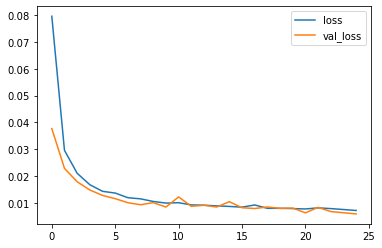

In [29]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [36]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67343
           1       1.00      1.00      1.00     58630

    accuracy                           1.00    125973
   macro avg       1.00      1.00      1.00    125973
weighted avg       1.00      1.00      1.00    125973



In [40]:
print(confusion_matrix(y_test,y_pred))

[[67194   149]
 [  164 58466]]
